## Implementing K-Means Clustering Model 

Source: K-means Clustering From Scratch In Python [Machine Learning Tutorial] - DataQuest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [22]:
df = pd.read_csv('../data/audio_cleaned.csv')

In [23]:
df.head()

,Unnamed: 0,release_date,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
0,0,1.0,5.272727,1.004272,1.581922,1.002876,1.002856,1.005677,1.802017,1.160955,4.673120,1.002803,1.366898,1.004426,1.004228,1.004568,4.485874,2.097500,10.0
1,1,1.0,3.272727,1.489975,1.884802,5.146641,1.009195,1.018088,1.441208,1.009562,1.013843,1.009023,2.107723,1.014101,3.863785,1.740638,1.009166,1.009338,10.0
2,2,1.0,2.045455,1.034466,1.022792,1.023200,1.022938,1.044994,1.040968,2.514633,4.490720,1.022508,4.043483,1.035078,1.033514,1.036210,1.022800,3.113880,10.0
3,3,1.0,3.409091,1.666690,1.011586,1.011764,1.011639,1.384052,1.020787,4.935399,1.017528,1.011420,1.011843,2.820012,1.017036,1.018407,3.069476,1.011819,10.0
4,4,1.0,3.136364,1.014718,1.009766,4.906505,1.009804,1.019279,1.017510,5.431992,1.014761,1.009620,1.009976,1.015030,1.014360,1.429323,1.628495,1.009956,10.0


In [24]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [25]:
# initialize random centroids 

# defining function random centroids that randomly iterates on each data point to find centroids

# Note: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead centroid = df.apply(lambda x: float(x.sample()))
def random_centroids(df,k):
    centroids = []
    for i in range (k):
        centroid = df.apply(lambda x: float(x.sample()))
        centroids.append(centroid) 
    return pd.concat(centroids, axis = 1)

In [26]:
centroids = random_centroids(df, 5)

centroids

/var/folders/yb/7r1lrc2d02b10hfzy3bjyz_00000gn/T/ipykernel_1300/3264488138.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = df.apply(lambda x: float(x.sample()))


,0,1,2,3,4
release_date,6.478261,7.521739,3.739130,5.043478,7.652174
len,9.545455,5.272727,4.000000,3.636364,3.454545
dating,1.027769,2.554168,1.004668,1.016862,2.472258
violence,1.020373,1.004189,6.405696,1.001191,1.016696
world/life,1.001127,1.014261,1.002632,1.023200,1.002356
night/time,3.360490,1.010844,4.165065,1.014107,1.012073
shake the audience,1.326647,1.014699,1.011565,1.023721,1.020600
family/gospel,1.699783,1.033013,1.008006,1.009473,1.091794
romantic,1.005672,1.006114,1.008470,1.006963,1.003993
communication,1.806483,1.022152,1.003836,1.009287,3.779590


In [27]:
# label each data point from how far each point is from centroid (cluster assignment)

def get_labels(df, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((df - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

labels = get_labels(df,centroids)

labels.value_counts()

1    13034
4    10004
3     3446
0     1123
2      755
Name: count, dtype: int64

In [28]:
# update centroids with geometric mean of clusters 

def new_centroids(df, labels, k):
    centroids = df.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

# repeat until centroids stop updating 

In [29]:
# plot cluster assignments at each iteration 

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

def plot_clusters(df, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(df)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

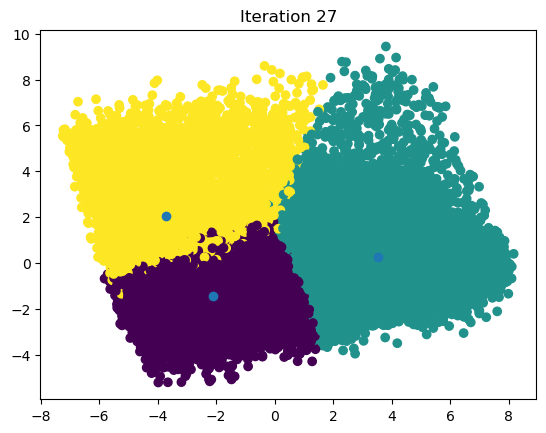

In [30]:
# producing graph that iterates up to 100/until centroids stop updating for 3 clusters 

max_iterations = 100
centroid_count = 3

centroids = random_centroids(df, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(df, centroids)
    centroids = new_centroids(df, labels, centroid_count)
    plot_clusters(df, labels, centroids, iteration)
    iteration += 1

In [31]:
# interpret cluster assignment

centroids 

,0,1,2
release_date,7.822332,3.658300,8.136716
len,3.479607,3.429699,6.600331
dating,1.165347,1.212512,1.179092
violence,1.869072,1.476533,1.609132
world/life,1.804889,1.737624,1.417940
night/time,1.349276,1.364393,1.248531
shake the audience,1.191567,1.173365,1.324074
family/gospel,1.164476,1.199967,1.192513
romantic,1.254135,1.396415,1.123518
communication,1.712611,1.653009,1.599794


In [33]:
audio_df = pd.read_csv('../data/train.csv')

In [34]:
genres = audio_df['genre']

genres = pd.concat([genres, df], axis=1)

genres

,genre,release_date,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
0,pop,1.0,5.272727,1.004272,1.581922,1.002876,1.002856,1.005677,1.802017,1.160955,4.673120,1.002803,1.366898,1.004426,1.004228,1.004568,4.485874,2.097500,10.0
1,pop,1.0,3.272727,1.489975,1.884802,5.146641,1.009195,1.018088,1.441208,1.009562,1.013843,1.009023,2.107723,1.014101,3.863785,1.740638,1.009166,1.009338,10.0
2,pop,1.0,2.045455,1.034466,1.022792,1.023200,1.022938,1.044994,1.040968,2.514633,4.490720,1.022508,4.043483,1.035078,1.033514,1.036210,1.022800,3.113880,10.0
3,pop,1.0,3.409091,1.666690,1.011586,1.011764,1.011639,1.384052,1.020787,4.935399,1.017528,1.011420,1.011843,2.820012,1.017036,1.018407,3.069476,1.011819,10.0
4,pop,1.0,3.136364,1.014718,1.009766,4.906505,1.009804,1.019279,1.017510,5.431992,1.014761,1.009620,1.009976,1.015030,1.014360,1.429323,1.628495,1.009956,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28357,hip hop,10.0,4.500000,1.014718,1.009766,1.009907,1.009804,1.019279,1.017510,1.010192,1.014761,4.550631,1.009976,7.136142,1.014360,1.015516,1.599730,1.009956,1.0
28358,hip hop,10.0,4.000000,1.013803,1.009162,1.327948,1.009195,1.018088,1.016423,1.631952,3.838529,3.890688,1.544365,2.900528,1.013472,1.014556,1.009166,1.009338,1.0
28359,hip hop,10.0,4.454545,1.016862,2.412293,2.578551,1.011230,1.714509,1.020057,1.336044,1.016911,4.233399,1.011427,1.965284,1.016440,1.017762,1.011184,1.011404,1.0
28360,hip hop,10.0,4.000000,1.012586,1.008360,1.008472,1.008386,1.870248,1.014977,1.008724,1.012623,5.464983,1.972065,1.012866,3.728657,1.013281,1.008363,1.008516,1.0


In [35]:
genres[labels ==0]

,genre,release_date,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
3241,pop,5.695652,1.863636,1.056929,6.932925,1.038320,1.037879,1.074245,1.067652,1.039248,1.057094,1.037168,1.038542,2.528324,1.055301,1.059751,1.037623,1.782912,5.304348
3267,pop,5.695652,3.636364,1.354366,5.575294,2.856224,1.006684,1.013172,1.011939,1.006963,1.010057,1.006559,1.006802,1.010269,1.009811,1.010600,3.392732,1.006788,5.304348
3295,pop,5.695652,1.454545,1.077253,7.164127,1.052000,1.051396,1.100711,1.091794,1.053239,1.077477,1.050432,1.052296,1.078514,1.075013,1.081049,1.051034,2.095468,5.304348
3313,pop,5.826087,3.590909,1.012586,6.534383,3.034231,1.008386,1.016503,1.014977,1.008724,1.012623,1.008229,1.008533,1.012866,3.144549,1.013281,1.008363,1.008516,5.173913
3317,pop,5.826087,4.409091,1.016862,4.192342,1.011350,1.918949,1.022071,1.672792,1.011668,1.016911,1.011019,1.011427,4.858200,1.016440,1.017762,1.011184,1.011404,5.173913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28323,hip hop,10.000000,1.409091,1.062472,1.041265,7.847370,1.041565,1.081463,1.074236,1.043064,1.062653,1.040785,1.042293,1.063509,1.060677,1.065559,1.041280,1.042210,1.000000
28337,hip hop,10.000000,2.454545,1.029215,1.861679,1.019665,1.019446,1.038157,1.034730,5.804834,1.654798,1.019081,1.019786,1.029747,1.671515,1.030707,1.019335,1.858602,1.000000
28341,hip hop,10.000000,2.636364,1.038996,1.025780,1.026249,1.025952,1.050894,1.046349,1.026904,1.039110,1.025465,4.039492,1.039677,1.037908,1.040958,1.025790,1.026354,1.000000
28348,hip hop,10.000000,2.590909,1.018822,1.012473,5.116949,1.012533,1.024623,1.022385,1.013017,1.018877,2.861559,1.012753,1.019196,1.018340,1.019816,2.082278,1.466305,1.000000


Cluster 0 = high violence and sadness, associated with the genres of hip hop and pop 

In [36]:
genres[labels ==1]

,genre,release_date,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
0,pop,1.000000,5.272727,1.004272,1.581922,1.002876,1.002856,1.005677,1.802017,1.160955,4.673120,1.002803,1.366898,1.004426,1.004228,1.004568,4.485874,2.097500,10.000000
1,pop,1.000000,3.272727,1.489975,1.884802,5.146641,1.009195,1.018088,1.441208,1.009562,1.013843,1.009023,2.107723,1.014101,3.863785,1.740638,1.009166,1.009338,10.000000
2,pop,1.000000,2.045455,1.034466,1.022792,1.023200,1.022938,1.044994,1.040968,2.514633,4.490720,1.022508,4.043483,1.035078,1.033514,1.036210,1.022800,3.113880,10.000000
3,pop,1.000000,3.409091,1.666690,1.011586,1.011764,1.011639,1.384052,1.020787,4.935399,1.017528,1.011420,1.011843,2.820012,1.017036,1.018407,3.069476,1.011819,10.000000
4,pop,1.000000,3.136364,1.014718,1.009766,4.906505,1.009804,1.019279,1.017510,5.431992,1.014761,1.009620,1.009976,1.015030,1.014360,1.429323,1.628495,1.009956,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25086,rock,5.956522,5.181818,1.225918,1.812961,1.609940,1.004379,1.008658,1.007821,1.004577,1.006580,1.004297,5.096329,2.087814,3.647402,2.180255,1.004387,1.275640,5.043478
25094,rock,5.956522,3.500000,1.013378,1.008882,1.327511,1.269406,1.017534,1.615177,1.009269,1.757216,1.008745,4.082519,3.812026,2.464736,2.725941,1.008885,1.009051,5.043478
25129,rock,5.956522,2.590909,1.019559,1.012959,1.013166,2.445524,2.069640,1.023261,1.013524,1.019616,4.099346,1.013252,3.281554,1.019056,1.020589,1.672025,1.470714,5.043478
25131,rock,5.956522,2.409091,1.032540,1.021522,2.189735,1.661945,1.949871,1.038681,1.022460,1.032635,1.021251,5.891086,1.033123,2.260351,1.034193,1.021530,1.934079,5.043478


Cluster 1 = high age and low release date, associated with the genres of pop and rock 

In [37]:
genres[labels ==2]

,genre,release_date,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
1857,pop,4.130435,8.863636,1.003424,1.384415,1.525659,1.002292,2.958216,1.004093,1.120604,2.654558,6.592702,1.002332,1.003564,1.003405,1.003679,1.002317,1.352508,6.869565
1926,pop,4.130435,8.681818,1.001377,4.734499,1.000927,1.000931,1.001907,1.001663,1.001008,1.001381,4.760432,1.000947,3.415349,1.001421,1.001535,1.000967,1.000945,6.869565
2265,pop,4.652174,9.136364,1.342970,1.001447,1.001418,1.001416,2.534671,1.467203,1.001510,1.002112,6.265196,1.001440,1.002227,1.002127,1.002299,1.001447,1.123072,6.347826
2272,pop,4.652174,9.045455,1.000803,1.404559,1.000541,1.000549,1.001160,3.800847,1.240157,1.000805,3.720480,1.000559,1.000904,1.691773,2.517905,1.000588,1.053222,6.347826
2626,pop,5.043478,6.272727,1.007952,3.317699,1.005353,1.005304,2.791394,1.285337,1.005534,1.912148,4.808150,1.005397,1.008161,1.007798,1.617271,1.005305,1.005386,5.956522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28357,hip hop,10.000000,4.500000,1.014718,1.009766,1.009907,1.009804,1.019279,1.017510,1.010192,1.014761,4.550631,1.009976,7.136142,1.014360,1.015516,1.599730,1.009956,1.000000
28358,hip hop,10.000000,4.000000,1.013803,1.009162,1.327948,1.009195,1.018088,1.016423,1.631952,3.838529,3.890688,1.544365,2.900528,1.013472,1.014556,1.009166,1.009338,1.000000
28359,hip hop,10.000000,4.454545,1.016862,2.412293,2.578551,1.011230,1.714509,1.020057,1.336044,1.016911,4.233399,1.011427,1.965284,1.016440,1.017762,1.011184,1.011404,1.000000
28360,hip hop,10.000000,4.000000,1.012586,1.008360,1.008472,1.008386,1.870248,1.014977,1.008724,1.012623,5.464983,1.972065,1.012866,3.728657,1.013281,1.008363,1.008516,1.000000


Cluster 2 = high obscenity, associated with the genres of pop and hip hop 

In [38]:
# implementing k means model from sklearn
kmeans = KMeans(3)
kmeans.fit(df)

/Users/nasehacho/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [39]:
audio_2 = audio_df.drop(['Unnamed: 0','lyrics', 'artist_name','track_name','genre','topic'], axis = 1)

audio_2


,release_date,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
0,1950,95,0.000598,0.063746,0.000598,0.000598,0.000598,0.048857,0.017104,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,1.000000
1,1950,51,0.035537,0.096777,0.443435,0.001284,0.001284,0.027007,0.001284,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,1.000000
2,1950,24,0.002770,0.002770,0.002770,0.002770,0.002770,0.002770,0.158564,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,1.000000
3,1950,54,0.048249,0.001548,0.001548,0.001548,0.021500,0.001548,0.411536,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,1.000000
4,1950,48,0.001350,0.001350,0.417772,0.001350,0.001350,0.001350,0.463430,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28357,2019,78,0.001350,0.001350,0.001350,0.001350,0.001350,0.001350,0.001350,0.001350,0.391651,0.001350,0.435089,0.001350,0.001350,0.065664,0.001350,0.014286
28358,2019,67,0.001284,0.001284,0.035338,0.001284,0.001284,0.001284,0.066324,0.203889,0.318910,0.058152,0.134955,0.001284,0.001284,0.001284,0.001284,0.014286
28359,2019,77,0.001504,0.154302,0.168988,0.001504,0.039755,0.001504,0.035401,0.001504,0.356685,0.001504,0.068684,0.001504,0.001504,0.001504,0.001504,0.014286
28360,2019,67,0.001196,0.001196,0.001196,0.001196,0.048359,0.001196,0.001196,0.001196,0.492434,0.103614,0.001196,0.202659,0.001196,0.001196,0.001196,0.014286


Text(0, 0.5, 'Euclidean Distance to Centroid')

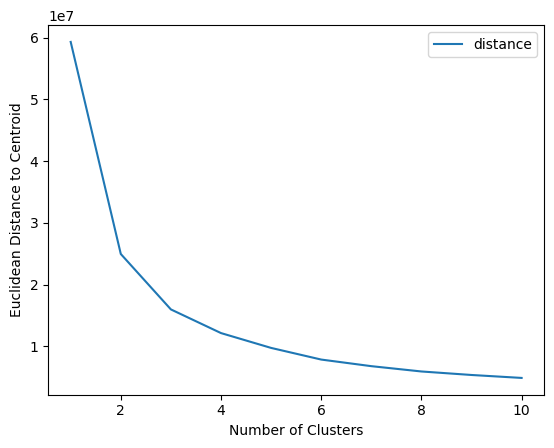

In [40]:
# implementing elbow method (sum of squares distance) to determine official optimal number of clusters 

Elbow = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(audio_2)
    Elbow.append([i, kmeans.inertia_])
Elbow = pd.DataFrame(Elbow, columns=['number_of_clusters', 'distance'])
Elbow.set_index("number_of_clusters").plot()
plt.xlabel("Number of Clusters")
plt.ylabel("Euclidean Distance to Centroid")

Optimal Amount of Clusters: 3 

In [41]:
kmeans = KMeans(3)
audio_2['Cluster'] = kmeans.fit_predict(audio_2)


/Users/nasehacho/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [42]:
info = audio_df[['genre', 'artist_name','track_name']]

info = pd.concat([info, audio_2], axis=1)

In [43]:
audio_2

,release_date,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
0,1950,95,0.000598,0.063746,0.000598,0.000598,0.000598,0.048857,0.017104,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,1.000000,2
1,1950,51,0.035537,0.096777,0.443435,0.001284,0.001284,0.027007,0.001284,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,1.000000,0
2,1950,24,0.002770,0.002770,0.002770,0.002770,0.002770,0.002770,0.158564,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,1.000000,0
3,1950,54,0.048249,0.001548,0.001548,0.001548,0.021500,0.001548,0.411536,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,1.000000,0
4,1950,48,0.001350,0.001350,0.417772,0.001350,0.001350,0.001350,0.463430,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28357,2019,78,0.001350,0.001350,0.001350,0.001350,0.001350,0.001350,0.001350,0.001350,0.391651,0.001350,0.435089,0.001350,0.001350,0.065664,0.001350,0.014286,2
28358,2019,67,0.001284,0.001284,0.035338,0.001284,0.001284,0.001284,0.066324,0.203889,0.318910,0.058152,0.134955,0.001284,0.001284,0.001284,0.001284,0.014286,2
28359,2019,77,0.001504,0.154302,0.168988,0.001504,0.039755,0.001504,0.035401,0.001504,0.356685,0.001504,0.068684,0.001504,0.001504,0.001504,0.001504,0.014286,2
28360,2019,67,0.001196,0.001196,0.001196,0.001196,0.048359,0.001196,0.001196,0.001196,0.492434,0.103614,0.001196,0.202659,0.001196,0.001196,0.001196,0.014286,2


In [44]:
info[audio_2['Cluster'] == 2]

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
0,pop,mukesh,mohabbat bhi jhoothi,1950,95,0.000598,0.063746,0.000598,0.000598,0.000598,...,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,1.000000,2
5,pop,perry como,round and round (with mitchell ayres and his o...,1950,98,0.001053,0.420685,0.001053,0.074078,0.001053,...,0.001053,0.001053,0.001053,0.001053,0.172173,0.001053,0.128292,0.001053,1.000000,2
10,pop,liva weel,"drømmer man om den, vågner..",1951,113,0.017090,0.026486,0.000774,0.000774,0.000774,...,0.079665,0.720557,0.080988,0.000774,0.065153,0.000774,0.000774,0.000774,0.985714,2
20,pop,mohammed rafi,jahan men log sachhe ashikon ko,1952,84,0.000693,0.392821,0.000693,0.000693,0.043832,...,0.000693,0.000693,0.000693,0.000693,0.033295,0.000693,0.435351,0.000693,0.971429,2
21,pop,ghantasala,avanee nee pathi,1952,104,0.000627,0.336365,0.110288,0.050451,0.000627,...,0.138306,0.000627,0.000627,0.054813,0.000627,0.026880,0.059252,0.037603,0.971429,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28357,hip hop,mack 10,10 million ways,2019,78,0.001350,0.001350,0.001350,0.001350,0.001350,...,0.001350,0.391651,0.001350,0.435089,0.001350,0.001350,0.065664,0.001350,0.014286,2
28358,hip hop,m.o.p.,ante up (robbin hoodz theory),2019,67,0.001284,0.001284,0.035338,0.001284,0.001284,...,0.203889,0.318910,0.058152,0.134955,0.001284,0.001284,0.001284,0.001284,0.014286,2
28359,hip hop,nine,whutcha want?,2019,77,0.001504,0.154302,0.168988,0.001504,0.039755,...,0.001504,0.356685,0.001504,0.068684,0.001504,0.001504,0.001504,0.001504,0.014286,2
28360,hip hop,will smith,switch,2019,67,0.001196,0.001196,0.001196,0.001196,0.048359,...,0.001196,0.492434,0.103614,0.001196,0.202659,0.001196,0.001196,0.001196,0.014286,2


In [45]:
info[audio_2['Cluster'] == 1]

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
6,pop,freestyle,opm medley: when i met you,1950,179,0.000483,0.000483,0.371817,0.040712,0.000483,...,0.384703,0.000483,0.000483,0.000483,0.044355,0.000483,0.000483,0.123150,1.000000,1
12,pop,frankie laine,necessary evil,1951,173,0.000627,0.244358,0.083570,0.000627,0.013375,...,0.109129,0.458984,0.000627,0.000627,0.000627,0.000627,0.000627,0.032581,0.985714,1
15,pop,les paul,chicken reel,1951,199,0.000349,0.018417,0.391879,0.000349,0.025737,...,0.000349,0.000349,0.000349,0.000349,0.000349,0.000349,0.034922,0.026084,0.985714,1
17,pop,les paul,dark eyes,1951,182,0.000358,0.378119,0.030934,0.000358,0.025127,...,0.019481,0.093725,0.000358,0.135552,0.058951,0.000358,0.066822,0.043335,0.985714,1
19,pop,asha bhosle,awaz deta hai sola ka din,1952,148,0.000431,0.031304,0.000431,0.000431,0.016906,...,0.000431,0.055847,0.072209,0.000431,0.000431,0.000431,0.000431,0.426457,0.971429,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28329,hip hop,fabolous,bad bitch,2019,162,0.000548,0.076798,0.000548,0.000548,0.026898,...,0.405045,0.377406,0.000548,0.000548,0.035199,0.000548,0.000548,0.000548,0.014286,1
28330,hip hop,jaydayoungan,hop out,2019,137,0.027956,0.000521,0.000521,0.000521,0.013074,...,0.000521,0.798901,0.000521,0.000521,0.000521,0.000521,0.076696,0.031645,0.014286,1
28333,hip hop,dj muggs,puppet master (feat. b real & dr. dre),2019,166,0.000849,0.234555,0.000849,0.052579,0.000849,...,0.000849,0.540851,0.000849,0.000849,0.000849,0.000849,0.000849,0.000849,0.014286,1
28338,hip hop,will smith,men in black,2019,182,0.127080,0.434874,0.174615,0.000537,0.000537,...,0.097766,0.043787,0.000537,0.000537,0.058491,0.000537,0.000537,0.016203,0.014286,1


In [46]:
info[audio_2['Cluster'] == 0]

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
1,pop,frankie laine,i believe,1950,51,0.035537,0.096777,0.443435,0.001284,0.001284,...,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,1.000000,0
2,pop,johnnie ray,cry,1950,24,0.002770,0.002770,0.002770,0.002770,0.002770,...,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,1.000000,0
3,pop,pérez prado,patricia,1950,54,0.048249,0.001548,0.001548,0.001548,0.021500,...,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,1.000000,0
4,pop,giorgos papadopoulos,apopse eida oneiro,1950,48,0.001350,0.001350,0.417772,0.001350,0.001350,...,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,1.000000,0
7,pop,johnny mathis,it's not for me to say,1950,21,0.002506,0.002506,0.336056,0.002506,0.002506,...,0.002506,0.002506,0.002506,0.002506,0.386887,0.002506,0.062602,0.002506,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28341,hip hop,kurtis blow,basketball,2019,37,0.003096,0.003096,0.003096,0.003096,0.003096,...,0.003096,0.003096,0.323370,0.003096,0.003096,0.003096,0.003096,0.003096,0.014286,0
28343,hip hop,cassidy,a.m. to p.m.,2019,52,0.001754,0.080629,0.001754,0.001754,0.001754,...,0.001754,0.373288,0.069015,0.172152,0.001754,0.001754,0.001754,0.001754,0.014286,0
28344,hip hop,eric b. & rakim,paid in full,2019,34,0.002392,0.002392,0.002392,0.002392,0.002392,...,0.255437,0.505241,0.002392,0.002392,0.002392,0.002392,0.002392,0.002392,0.014286,0
28346,hip hop,$uicideboy$,you're now tuning into 66.6 fm with dj rapture...,2019,43,0.002024,0.002024,0.002024,0.002024,0.002024,...,0.263164,0.435220,0.002024,0.002024,0.046850,0.002024,0.002024,0.002024,0.014286,0


In [47]:
audio_2.to_csv('trained.csv', index=False)